<a href="https://colab.research.google.com/github/fjadidi2001/DiabetPrediction/blob/main/Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himanshu86503/dibetes33hi")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/himanshu86503/dibetes33hi/versions/1


In [3]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.3 MB/s eta 0:00:00



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1054

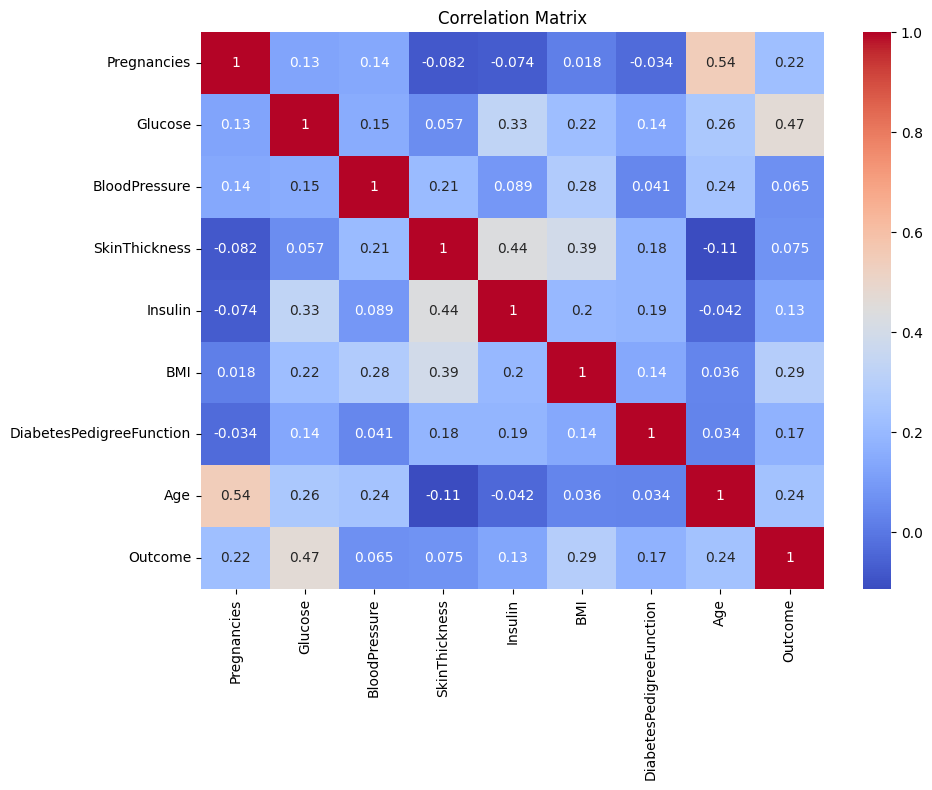

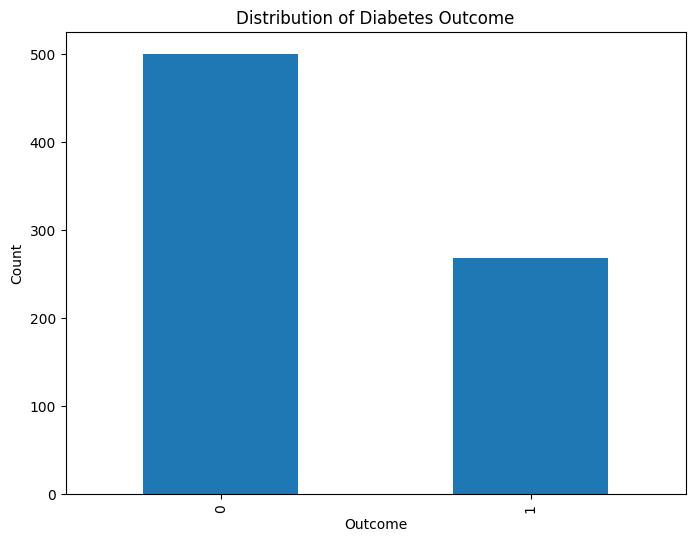

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.98486 | val_0_auc: 0.65306 | val_1_auc: 0.60882 |  0:00:00s
epoch 1  | loss: 0.67784 | val_0_auc: 0.71532 | val_1_auc: 0.6303  |  0:00:00s
epoch 2  | loss: 0.58876 | val_0_auc: 0.73345 | val_1_auc: 0.72489 |  0:00:00s
epoch 3  | loss: 0.56123 | val_0_auc: 0.73423 | val_1_auc: 0.74913 |  0:00:00s
epoch 4  | loss: 0.51412 | val_0_auc: 0.75758 | val_1_auc: 0.75445 |  0:00:00s
epoch 5  | loss: 0.50377 | val_0_auc: 0.7769  | val_1_auc: 0.77888 |  0:00:00s
epoch 6  | loss: 0.48941 | val_0_auc: 0.79556 | val_1_auc: 0.78182 |  0:00:01s
epoch 7  | loss: 0.48051 | val_0_auc: 0.81279 | val_1_auc: 0.79137 |  0:00:01s
epoch 8  | loss: 0.47215 | val_0_auc: 0.82408 | val_1_auc: 0.80165 |  0:00:01s
epoch 9  | loss: 0.45522 | val_0_auc: 0.83484 | val_1_auc: 0.79357 |  0:00:01s
epoch 10 | loss: 0.45058 | val_0_auc: 0.84156 | val_1_auc: 0.79743 |  0:00:01s
epoch 11 | loss: 0.43603 | val_0_auc: 0.84862 | val_1_auc: 0.78825 |  0:00:01s
epoch 12 | loss: 0.41102 | val_0_auc: 0.85184 | val_

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


<Figure size 1000x600 with 0 Axes>

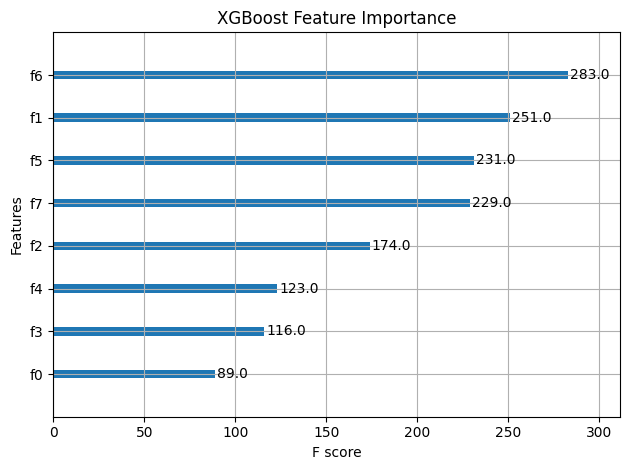

In [12]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset

df = pd.read_csv('diabetes.csv')
# Step 2: Exploratory Data Analysis (EDA)
def perform_eda(df):
    print("\nDataset Info:")
    print(df.info())

    print("\nDescriptive Statistics:")
    print(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Correlation matrix plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Distribution of target variable
    plt.figure(figsize=(8, 6))
    df['Outcome'].value_counts().plot(kind='bar')
    plt.title('Distribution of Diabetes Outcome')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.show()

perform_eda(df)

# Step 3: Preprocess data and split
def preprocess_data(df):
    # Separate features and target
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Handle missing values if any
    X = X.fillna(X.mean())

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test, scaler

X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

# Step 4: Train Models
def train_xgboost(X_train, X_test, y_train, y_test):
    # XGBoost model
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    return xgb_model

def train_tabnet(X_train, X_test, y_train, y_test):
    # TabNet model
    tabnet_model = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax'
    )

    # Convert to PyTorch tensors with correct data type (This line is already present, no change needed)
    X_train_tab = torch.tensor(X_train, dtype=torch.float32)
    y_train_tab = torch.tensor(y_train.values, dtype=torch.long)
    X_test_tab = torch.tensor(X_test, dtype=torch.float32)

    # Convert back to NumPy arrays before passing to TabNet
    X_train_np = X_train_tab.cpu().numpy()  # Convert to NumPy array
    X_test_np = X_test_tab.cpu().numpy()   # Convert to NumPy array
    y_train_np = y_train_tab.cpu().numpy() # Convert to NumPy array
    y_test_np = torch.tensor(y_test.values, dtype=torch.long).cpu().numpy() # Convert to NumPy array

    tabnet_model.fit(
        X_train=X_train_np, y_train=y_train_np, # Pass NumPy arrays
        eval_set=[(X_train_np, y_train_np), (X_test_np, y_test_np)], # Pass NumPy arrays
        max_epochs=50,
        patience=10,
        batch_size=256
    )

    return tabnet_model

# Train both models
xgb_model = train_xgboost(X_train, X_test, y_train, y_test)
tabnet_model = train_tabnet(X_train, X_test, y_train, y_test)

# Step 5: Evaluate Models
def evaluate_models(xgb_model, tabnet_model, X_test, y_test):
    # XGBoost predictions
    xgb_pred = xgb_model.predict(X_test)
    print("\nXGBoost Results:")
    print("Accuracy:", accuracy_score(y_test, xgb_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, xgb_pred))

    # TabNet predictions
    tabnet_pred = tabnet_model.predict(torch.FloatTensor(X_test))
    print("\nTabNet Results:")
    print("Accuracy:", accuracy_score(y_test, tabnet_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, tabnet_pred))

    # Feature importance plot for XGBoost
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(xgb_model)
    plt.title('XGBoost Feature Importance')
    plt.tight_layout()
    plt.show()

evaluate_models(xgb_model, tabnet_model, X_test, y_test)